# Проектирование модели машинного обучения для решения задачи классификации цветков

Импорт требуемых библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib
help(pathlib.Path)

Help on class Path in module pathlib:

class Path(PurePath)
 |  Path(*args, **kwargs)
 |  
 |  PurePath subclass that can make system calls.
 |  
 |  Path represents a filesystem path but unlike PurePath, also offers
 |  methods to do system calls on path objects. Depending on your system,
 |  instantiating a Path will return either a PosixPath or a WindowsPath
 |  object. You can also instantiate a PosixPath or WindowsPath directly,
 |  but cannot instantiate a WindowsPath on a POSIX system or vice versa.
 |  
 |  Method resolution order:
 |      Path
 |      PurePath
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, t, v, tb)
 |  
 |  absolute(self)
 |      Return an absolute version of this path.  This function works
 |      even if the path doesn't point to anything.
 |      
 |      No normalization is done, i.e. all '.' and '..' will be kept along.
 |      Use resolve() to get the canonical path to a file.
 |  
 |  chmod(self,

Забись датасета в память и подготовка к обучению

In [17]:
data_dir = pathlib.Path(r'D:\PROJECTS_AND_DOCUMENTS\PROJECTS\Pyton and Jupyter\Computer Vision Practice\Data\flowers')

In [18]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4317


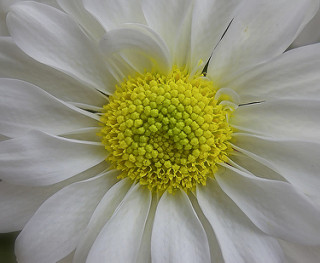

In [19]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[0]))

In [20]:
# Параметры отвечающие за размер принимаемого изображения и размер пакета данных
batch_size = 32
img_height = 176
img_width = 176

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [23]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

Примеры изображений в первом пакете

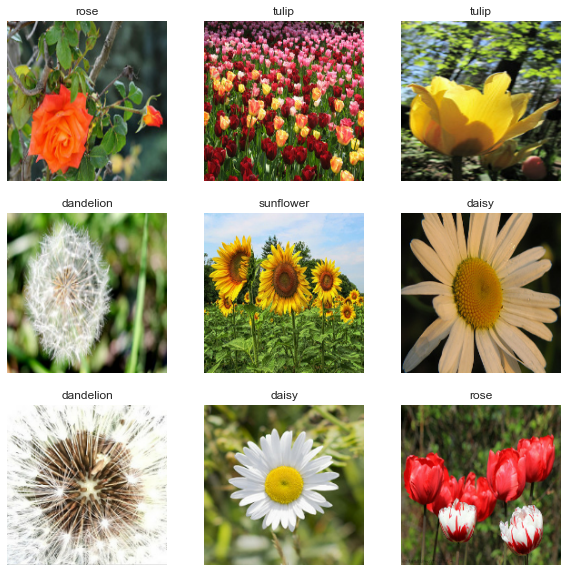

In [24]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
#  Оптимизация
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:
num_classes = len(class_names)

# Структура исользованной свёрточной нейронной сети
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(num_classes)
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
108/108 [==============================] - 30s 267ms/step - loss: 1.4129 - accuracy: 0.3657 - val_loss: 1.4025 - val_accuracy: 0.3476
Epoch 2/15
108/108 [==============================] - 30s 274ms/step - loss: 1.1994 - accuracy: 0.4899 - val_loss: 1.1076 - val_accuracy: 0.5319
Epoch 3/15
108/108 [==============================] - 30s 278ms/step - loss: 1.0505 - accuracy: 0.5845 - val_loss: 0.9726 - val_accuracy: 0.6107
Epoch 4/15
108/108 [==============================] - 31s 290ms/step - loss: 0.9639 - accuracy: 0.6326 - val_loss: 0.9527 - val_accuracy: 0.6153
Epoch 5/15
108/108 [==============================] - 29s 272ms/step - loss: 0.8979 - accuracy: 0.6552 - val_loss: 0.8666 - val_accuracy: 0.6419
Epoch 6/15
108/108 [==============================] - 29s 271ms/step - loss: 0.8557 - accuracy: 0.6726 - val_loss: 0.8715 - val_accuracy: 0.6616
Epoch 7/15
108/108 [==============================] - 31s 290ms/step - loss: 0.7890 - accuracy: 0.7009 - val_loss: 0.8833 - val_ac

Сохранение модели

In [39]:
model.save('Dropout_model')

INFO:tensorflow:Assets written to: Dropout_model\assets


INFO:tensorflow:Assets written to: Dropout_model\assets


Сохранение модели в старом формате

In [40]:
model.save('Dropout_model_old.h5')

Вывод граффиков зависимости точностей и функций потерь на тренировочном и проверочном наборах данных от количества пройденных эпох

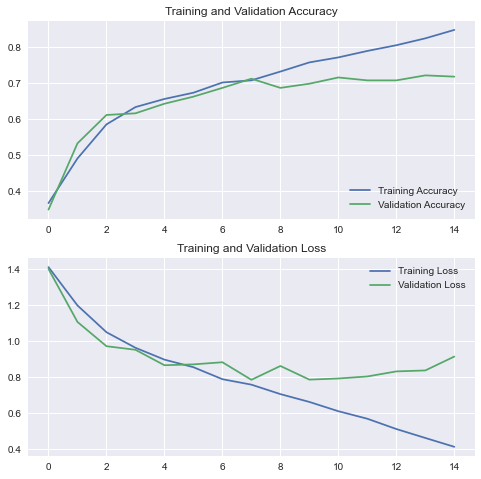

In [41]:
plt.style.use('seaborn')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Схема слоёв применяемой CNN

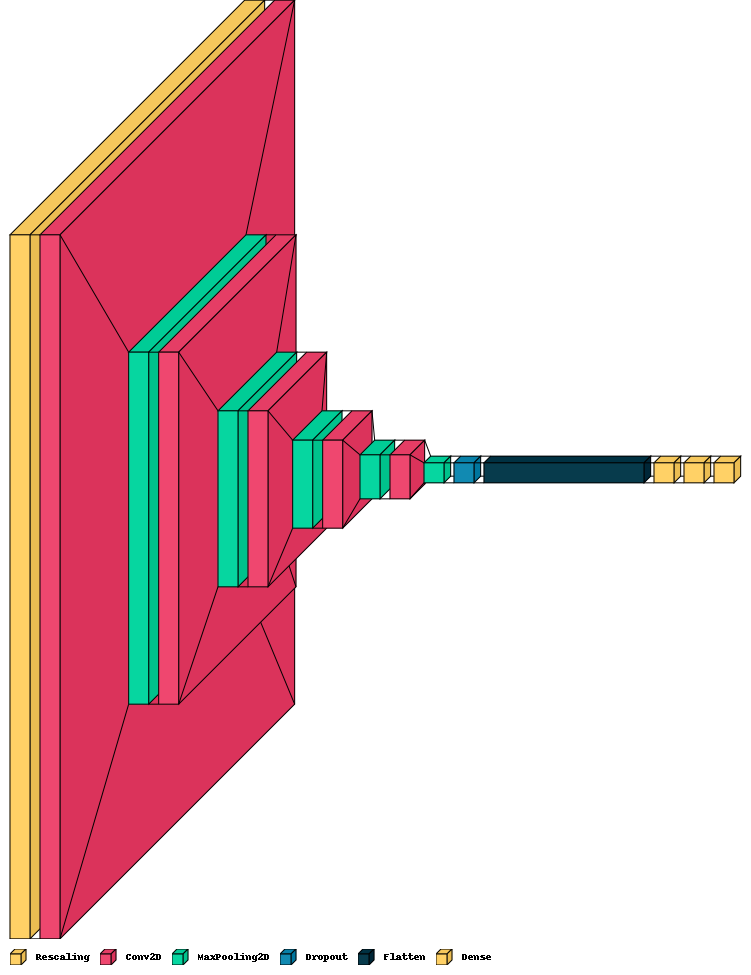

In [49]:
import visualkeras
visualkeras.layered_view(model,legend=True, draw_volume=True)

Проверим работу нейронной сети на одном из изображений

In [51]:
import cv2
img = cv2.imread(os.getcwd()+r"\Data\flowers\daisy\1285423653_18926dc2c8_n.jpg")
img = cv2.resize(img, (176, 176), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [52]:
img = np.array([img])

In [54]:
pred = model.predict(img)

1/1 [==============================] - 0s 22ms/step


In [56]:
print((np.array(tf.nn.softmax(pred[0]), dtype=np.float32))*100)

[94.940605    1.7933167   0.73656535  1.6686002   0.8609257 ]


In [57]:
class_names[np.argmax(pred)]

'daisy'